#### Import dependencies 

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

params = {'legend.fontsize': 'x-large',
          'axes.labelsize': 'x-large',
          'axes.titlesize': 'x-large',
          'xtick.labelsize': 'x-large',
          'ytick.labelsize': 'x-large'}
pylab.rcParams.update(params)
plt.style.use('ggplot')

np.random.seed(42)


#### Read data 

In [2]:
dataframe = pd.read_csv(r"data_Q1.csv", lineterminator="\n")

y = dataframe['medianHouseValue\r'].values[:, np.newaxis].T
X = dataframe.drop(columns=['medianHouseValue\r']).values.T

headers = dataframe.columns.values.tolist()
features = headers[:-1]
target = headers[-1][:-1]


#### Plot data 

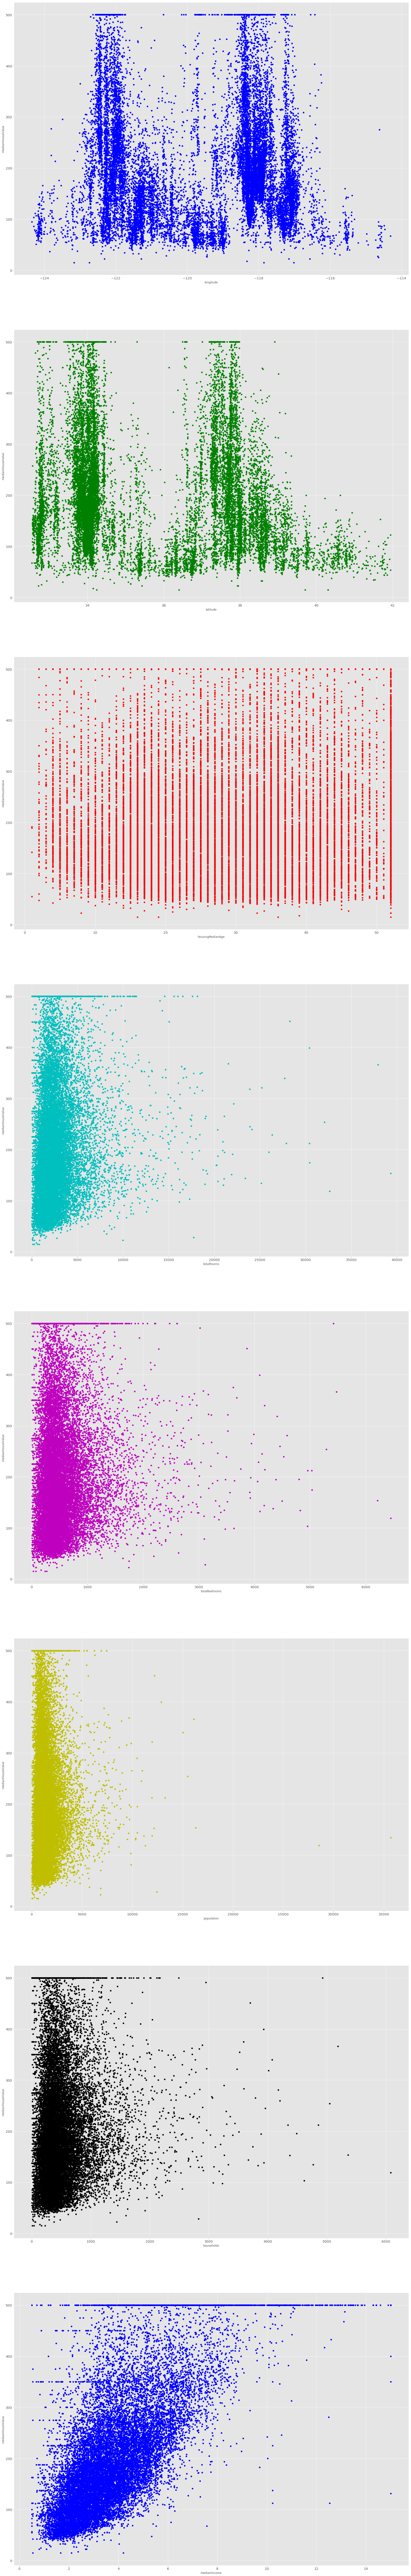

In [3]:
plt.figure(figsize=(30, 200))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'b']
for index, feature in enumerate(features):
    plt.subplot(8, 1, index + 1)
    plt.scatter(X[index, :], y, color=colors[index])
    plt.ylabel(target)
    plt.xlabel(feature)
# plt.savefig('features.png')


#### Add a column of ones to X 

In [4]:
ones = np.ones(X.shape[1])[:, np.newaxis].T
X = np.concatenate((ones, X), axis=0)


#### Shuffle data and Split to train and test  

In [5]:
indices = np.random.permutation(X.shape[1])
test_size = len(y[0]) // 4
training_idx, test_idx = indices[test_size:], indices[:test_size]
X_train, y_train = X[:, training_idx], y[:, training_idx]
X_test, y_test = X[:, test_idx], y[:, test_idx]


#### Linear Regression

In [6]:
A = X_train @ X_train.T
b = X_train @ y_train.T
w = (np.linalg.inv(A) @ b)


#### Loss function

In [7]:
def mse(A, B):
    return np.square(A - B).mean(axis=1)[0]


#### Empirical Loss 

In [8]:
y_train_pred = np.dot(w.T, X_train)
print(mse(y_train_pred, y_train))


4868.082195560076


#### True Loss 

In [9]:
X_test_X = X_test.T
y_test_pred = np.dot(w.T, X_test)
print(mse(y_test_pred, y_test))


4733.478053347094


In [10]:
print(w)

[[-3.60177024e+03]
 [-4.29635329e+01]
 [-4.28519988e+01]
 [ 1.19624645e+00]
 [-7.44358569e-03]
 [ 1.15680278e-01]
 [-3.60632428e-02]
 [ 3.62235494e-02]
 [ 4.00741084e+01]]
